# **Space X  Falcon 9 First Stage Landing Prediction**
# Machine Learning Prediction
![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# plot for confusion matrix

In [38]:
def plot_confusion_matrix(y,y_predict):
    cm=confusion_matrix(y,y_predict)
    ax=plt.subplot()
    sns.heatmap(cm,annot=True,ax=ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('confusion matrix')
    ax.xaxis.set_ticklabels(['did not land','land']);ax.yaxis.set_ticklabels(['did not land','landed'])

# dataset

In [13]:
data=pd.read_csv('datasets/dataset_part_2.csv')
data.head()
X=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
X

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1
Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [10]:
y=data['Class'].to_numpy()
y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## TASK  2
Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.

In [18]:
transform=preprocessing.StandardScaler()
x=transform.fit_transform(X)

In [19]:
x

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

## TASK  3
Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


In [53]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [68]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((72, 83), (18, 83), (72,), (18,))

# TASK 4
Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [22]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [24]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression(random_state=12345)

grid_search_lr=GridSearchCV(
    estimator=lr,
    param_grid=parameters,
    scoring='accuracy',
    cv=10
)

In [25]:
logreg_cv=grid_search_lr.fit(xtrain,ytrain)

In [26]:
logreg_cv

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=12345),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [27]:
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5
Calculate the accuracy on the test data using the method <code>score</code>:

In [29]:
logreg_cv.score(xtest,ytest)

0.8333333333333334

In [32]:
yhat_lr=logreg_cv.predict(xtest)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

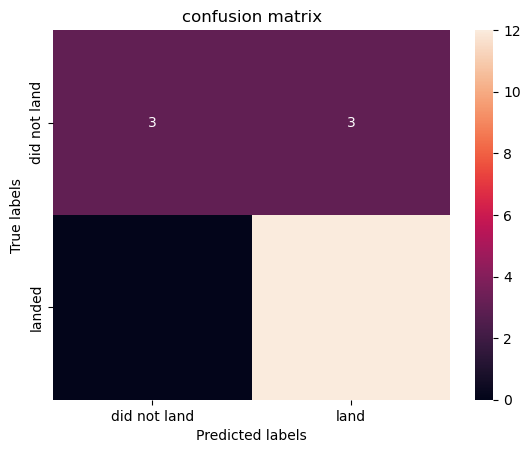

In [40]:
yhat_lr = logreg_cv.predict(xtest)
plot_confusion_matrix(ytest, yhat_lr)
yhat_lr

# TASK 6
Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [42]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC(random_state=12345)

In [43]:
grid_search_svm=GridSearchCV(
    estimator=svm,
    param_grid=parameters,
    scoring='accuracy',
    cv=10,
)
svm_cv=grid_search_svm.fit(xtrain,ytrain)

In [44]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7
Calculate the accuracy on the test data using the method <code>score</code>:


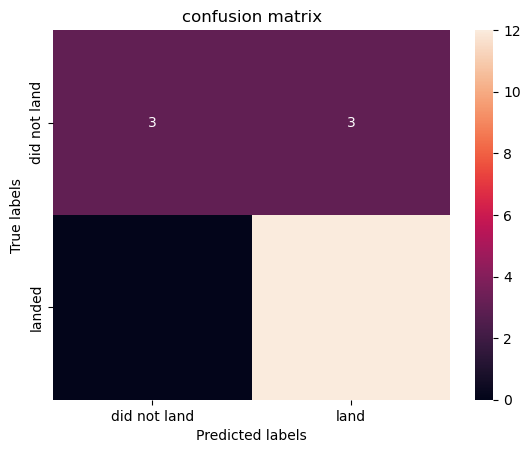

In [47]:
yhat=svm_cv.predict(xtest)
plot_confusion_matrix(ytest,yhat)

## TASK  8
Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [58]:
tree=DecisionTreeClassifier(random_state=1)
parameters_tree={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features':['log2','sqrt',None,0.5,0.75,1],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5,10],
}

grid_search_tree=GridSearchCV(
    estimator=tree,
    param_grid=parameters_tree,
    scoring='accuracy',
    cv=10
)
tree_cv=grid_search_tree.fit(xtrain,ytrain)

In [59]:
print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2, 'max_features': 0.75, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8607142857142855


## TASK  9
Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:

In [61]:
print('Accuracy on test data is: {:.3f}'.format(tree_cv.score(xtest, ytest)))

Accuracy on test data is: 0.833


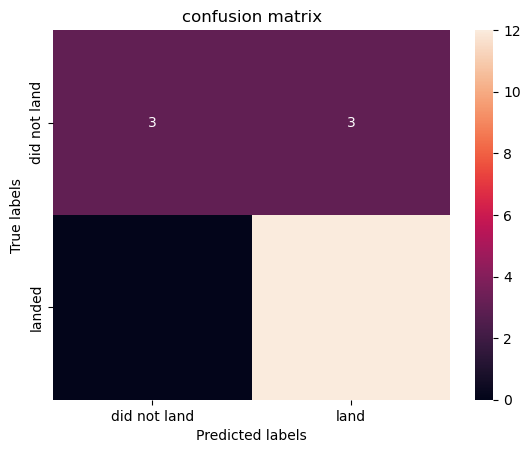

In [62]:
yhat_tree = tree_cv.predict(xtest)
plot_confusion_matrix(ytest, yhat_tree)

## TASK  10
Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [63]:
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# define the model
knn = KNeighborsClassifier()

# define the grid search object
grid_search_knn = GridSearchCV(
    estimator = knn,
    param_grid = parameters_knn,
    scoring = 'accuracy',
    cv = 10
)
# execute search
knn_cv = grid_search_knn.fit(xtrain, ytrain)

In [64]:
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11
Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:

In [65]:
print('Accuracy on test data is: {:.3f}'.format(knn_cv.score(xtest, ytest)))

Accuracy on test data is: 0.833


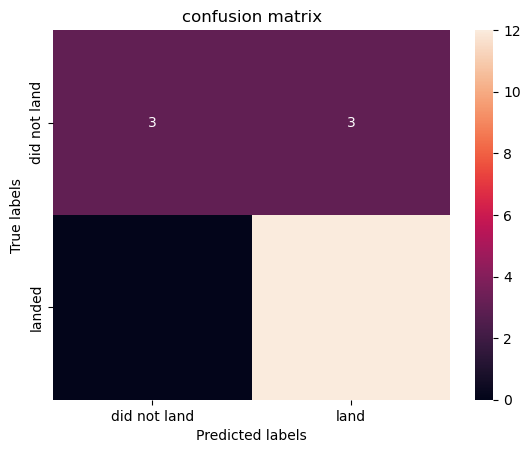

In [66]:
yhat_knn = knn_cv.predict(xtest)
plot_confusion_matrix(ytest, yhat_knn)

## TASK  12
Find the method performs best:


In [67]:
models = {'KNeighbors':knn_cv.best_score_,
              'DecisionTree':tree_cv.best_score_,
              'LogisticRegression':logreg_cv.best_score_,
              'SupportVector': svm_cv.best_score_}

bestalgorithm = max(models, key=models.get)
print('Best model is', bestalgorithm,'with a score of', models[bestalgorithm])
if bestalgorithm == 'DecisionTree':
    print('Best params is :', tree_cv.best_params_)
if bestalgorithm == 'KNeighbors':
    print('Best params is :', knn_cv.best_params_)
if bestalgorithm == 'LogisticRegression':
    print('Best params is :', logreg_cv.best_params_)
if bestalgorithm == 'SupportVector':
    print('Best params is :', svm_cv.best_params_)

Best model is DecisionTree with a score of 0.8607142857142855
Best params is : {'criterion': 'gini', 'max_depth': 2, 'max_features': 0.75, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
